# DSCI-633-03 Lab #3
## Machine Learning in Python

## Your Name: Stephen Cook

### 1. Load the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
#import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as pyplot
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

ModuleNotFoundError: No module named 'sklearn'

In [88]:
# Load Iris data (Q1)
filename = 'iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] #Column names
# Panda read_csv() for reading the iris csv file
df = pd.read_csv(filename)

### 2. Summarize the Dataset

In [89]:
# Q2.1 How many instances are there?
# Q2.2 How many attributes are there?

print("Number of instances: "   +   str(df.shape[0]))
print("Number of attributes: "  +   str(df.shape[1]))

Number of instances: 150
Number of attributes: 5


In [90]:
# Q2.3 How many possible values does the class attribute have?
print("Number of attributes for class: " + str(df['class'].nunique()))

Number of attributes for class: 3


In [91]:
# Display the first 10 records
print(df.head(10))

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa


In [92]:
# Print information about a DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [93]:
# View some statistical details
print(df.describe())

       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [94]:
# Q2.4 Class distribution: # records by class values
class_values = df['class'].value_counts()
print(class_values)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


### 3. Data Visulization

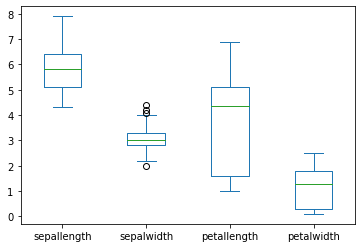

In [95]:
# box and whisker plots (Q3.1)
df.plot(kind='box',subplots=False,sharex=False, sharey=False)
plt.show()

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

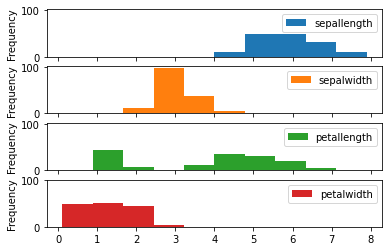

In [96]:
# histograms (3.2)
df.plot(kind="hist", subplots=True, sharex = True, sharey = True)

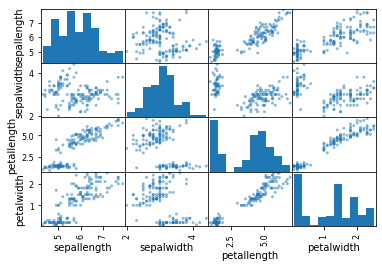

In [97]:
# scatter plot matrix (3.3)
scatter_matrix(df)
plt.show()

### 4. Decision Tree Model Building

In [98]:
#wouldn't it be easier to split into training set and test set then split?

# Q4.1: Splitting the dataset: 
X = df.loc[:, df.columns != 'class']     # X is having all the dependent varials
y = df['class']                         # y is having an independent variable: 'class'
print("X Shape: rows: " + str(X.shape[0]) + " columns: " + str(X.shape[1])) # X & y shapes (# rows & # columns)
# shape of the y dataset is (150,) this is causing errors
print("Y Shape: rows: " + str(y.shape[0]) + " columns: 1")

X Shape: rows: 150 columns: 4
Y Shape: rows: 150 columns: 1


In [99]:
# Q4.2: Train Test split: (80,20)

# gets 80% of the data set randomly
X_train = X.sample(frac=.8,replace=False)
# gets the remaining values from the dataset
X_test  = X.loc[X.index.difference(X_train.index)]
# Get the corresponding values from the y set
y_train, y_test = y.loc[X_train.index] , y.loc[X_test.index]

In [100]:
# Q4.3: Decision Tree Algorithm
# Instantiate the DecisionTreeClassifier using Entropy for splitting attribues
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
# Build a DT model using the Training dataset (X_train)
classifier = clf.fit(X=X_train, y=y_train)
# Test the model with X_test
y_pred = classifier.predict(X_test)

In [101]:
#4.4:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Generate Confidence Matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))
# Classification Report
print(classification_report(y_true=y_test, y_pred=y_pred ))
# Accuracy
print(accuracy_score(y_true=y_test, y_pred=y_pred))

[[ 8  0  0]
 [ 0 14  0]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

0.9666666666666667


In [102]:
# Print Decision Tree Representation
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_1 <= 2.55
|   |   |   |   |--- feature_3 <= 1.40
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_3 >  1.40
|   |   |   |   |   |--- feature_0 <= 6.10
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |   |--- feature_0 >  6.10
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_1 >  2.55
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



In [103]:
# Save the text_presentation to a file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### 5. Classify new unknown data (iris_unknown.csv)

In [108]:
# Q5.1: Load Iris unknown data
f_unknown = 'Lab02_unknown_Cook.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df_unknown = pd.read_csv(f_unknown)


In [109]:
# print unknown data file
print(df_unknown)

   sepallength  sepalwidth  petallength  petalwidth
0          5.0         3.1          1.4         0.3
1          6.7         3.4          5.3         1.3
2          6.0         4.4          2.4         1.5


In [110]:
# Q5.2: Predict the class values for the three unknown iris flowers
unknown_pred = classifier.predict(df_unknown)

In [112]:
# Q5.3: Print the predicted class values
print(unknown_pred )

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
